In [1]:
import re
import unicodedata
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import fitzsimon_constants_prepare as c

# Key takeaways:
- Shell represents 0.53 of the readme
- 112 rows have no language stated
- median wordcount is 150, but the top ten languages all had median wordcounts about 50 words more
    - note: this is after cleaning
- 43724 (40k) unique words in the cleaned corpus
- python was not more associated with raspberry pi, but `rasp` shows up a lot (over 500 times)
- median number of unique words was 96
    - again the top ten languages had a median number of unique words that was higher than the overall median

- "install" and "use" represent about 0.03 of the corpus

In [2]:
df_debian = pd.read_json('debian_data.json')
df_debian = df_debian[df_debian.language.notnull()]
df_debian

,repo,language,readme_contents
0,boxcutter/debian,Shell,# Packer templates for Debian written in legac...
1,wszqkzqk/deepin-wine-ubuntu,C,# Deepin wine for Ubuntu and Debian\n\n## 一、项目...
2,openfans-community-offical/Debian-Pi-Aarch64,Shell,# Notice !!!!!!!!!\n\n## Notify:\n\n## Stateme...
3,AdnanHodzic/displaylink-debian,Shell,# displaylink-debian\n\nDisplayLink driver ins...
4,teddysun/shadowsocks_install,Shell,![Shadowsocks](https://github.com/teddysun/sha...
...,...,...,...
1095,activecm/bro-install,Shell,# Bro-Install\nAn Installation Script for Bro ...
1096,protonet/nginx-debian,Perl,wget http://archive.ubuntu.com/ubuntu/pool/uni...
1097,Yubico/pam-u2f-dpkg,Shell,Pluggable Authentication Module (PAM) Universa...
1098,Yubico/libu2f-server-dpkg,Shell,Yubico Universal 2nd Factor (U2F) Server C Lib...


In [3]:
df_debian[df_debian.language.isna()].shape

(0, 3)

In [4]:
debian_corpus = ' '.join(df_debian['readme_contents'])
debian_corpus[:100]

'# Packer templates for Debian written in legacy JSON\n\n### Overview\n\nThis repository contains Packer '

In [5]:
debian_corpus_list = c.clean_data(debian_corpus)
pd.Series(debian_corpus_list).value_counts().nlargest(20)

use         5368
instal      5312
file        3312
packag      3211
debian      2915
run         2884
build       2455
sudo        2148
version     1997
default     1985
script      1954
imag        1905
system      1887
configur    1871
set         1844
make        1731
support     1672
kernel      1572
option      1524
need        1475
dtype: int64

# What are the most common languages for these readmes?

Text(0.5, 1.0, 'Count of languages in dataframe')

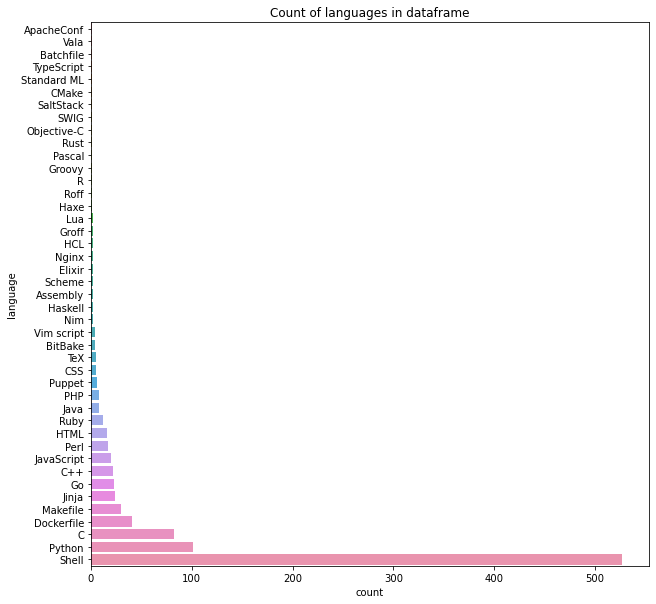

In [6]:
plt.figure(figsize = (10,10))
sns.countplot(data=df_debian, y = 'language', order=df_debian.groupby('language').size().sort_values().index)
plt.title('Count of languages in dataframe')

In [7]:
# ten most common languages
pd.concat([df_debian.language.value_counts(),df_debian.language.value_counts(normalize=True)], axis = 1)

,language,language
Shell,527,0.533401
Python,101,0.102227
C,82,0.082996
Dockerfile,41,0.041498
Makefile,30,0.030364
Jinja,24,0.024291
Go,23,0.023279
C++,22,0.022267
JavaScript,20,0.020243
Perl,17,0.017206


# How long is a typical readme in clean wordcount?

In [8]:
df_debian['length_of_readme'] = df_debian['readme_contents'].apply(lambda r : len(c.clean_data(r)))

<AxesSubplot:>

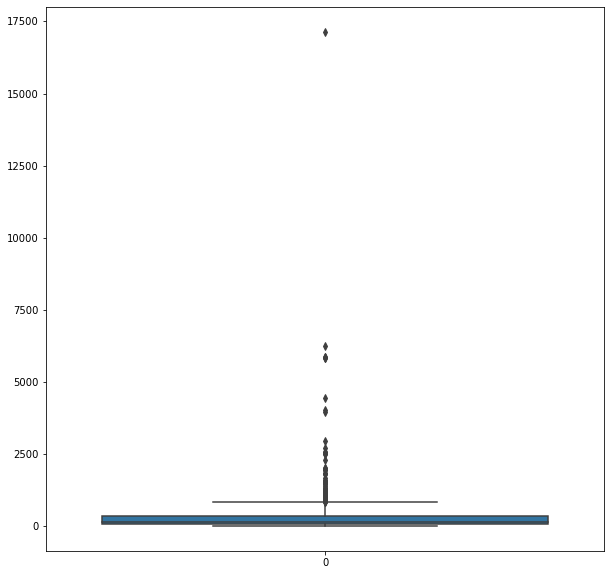

In [9]:
plt.figure(figsize = (10,10))
sns.boxplot(data = df_debian.length_of_readme)

In [10]:
df_debian.length_of_readme.describe()

count      988.000000
mean       348.944332
std        801.471892
min          0.000000
25%         57.750000
50%        154.000000
75%        363.250000
max      17138.000000
Name: length_of_readme, dtype: float64

<AxesSubplot:xlabel='length_of_readme', ylabel='language'>

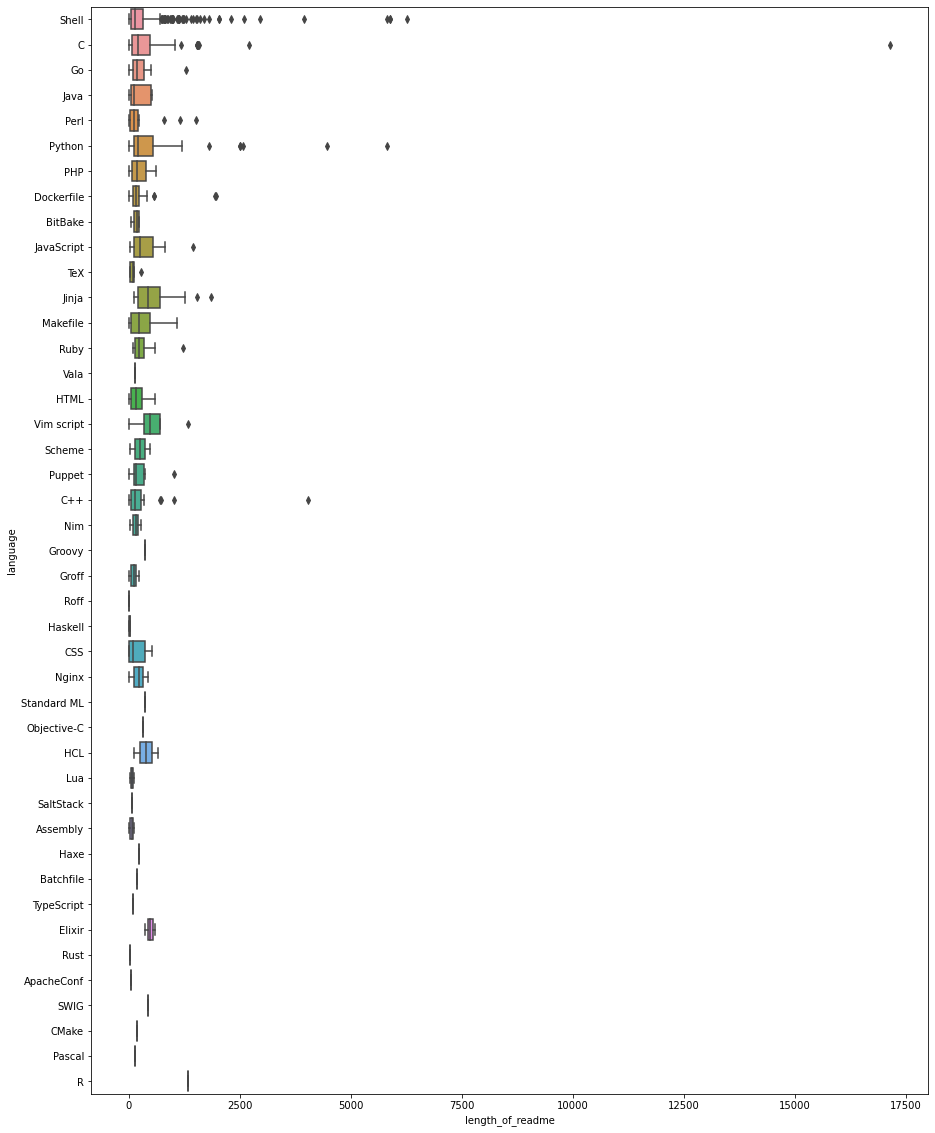

In [11]:
plt.figure(figsize = (15,20))
sns.boxplot(data = df_debian, x = 'length_of_readme', y='language')

In [12]:
sort_column = '50%'
df_debian.groupby('language').length_of_readme.describe().sort_values(sort_column, ascending=False)[sort_column].nlargest(10)

language
R              1328.0
Elixir          476.5
Vim script      470.0
SWIG            439.0
Jinja           430.0
HCL             375.5
Groovy          368.0
Standard ML     353.0
Objective-C     305.0
Scheme          246.0
Name: 50%, dtype: float64

In [13]:
#longest readme is actually a boot program
df_debian[df_debian['length_of_readme'] == 18116]

,repo,language,readme_contents,length_of_readme


In [14]:
#count of repos with no readme
df_debian[df_debian['length_of_readme'] == 0].shape

(44, 4)

# Number of unique words in corpus

In [15]:
debian_corpus_series = pd.Series(debian_corpus_list)
pd.Series(debian_corpus_list).nunique()

39125

In [16]:
pd.Series(debian_corpus_list).value_counts().nlargest(20)

use         5368
instal      5312
file        3312
packag      3211
debian      2915
run         2884
build       2455
sudo        2148
version     1997
default     1985
script      1954
imag        1905
system      1887
configur    1871
set         1844
make        1731
support     1672
kernel      1572
option      1524
need        1475
dtype: int64

# Python corpus

In [17]:
python_corpus = c.clean_data(' '.join(df_debian[df_debian.language == 'Python'].readme_contents))
python_corpus[:10]

['dhvirtualenv',
 'build',
 'statu',
 'doc',
 'content',
 'overviewoverview',
 'present',
 'blog',
 'resourcespresentationsblogsotherresourc',
 'use']

In [18]:
pd.Series(python_corpus).value_counts().nlargest(20)

use         853
packag      767
instal      687
file        584
build       436
debian      423
python      395
run         317
version     307
download    284
see         268
default     267
option      258
imag        235
configur    232
command     222
need        215
updat       214
system      211
support     211
dtype: int64

In [19]:
python_corpus_series = pd.Series(python_corpus)
python_corpus_series[python_corpus_series.str.contains('rasp')].count()

7

In [20]:
debian_corpus_series[debian_corpus_series.str.contains('rasp')].count()

425

# Make a clean readme contents column

In [21]:
df_debian['clean_readme'] = df_debian.readme_contents.apply(c.clean_data)
df_debian

,repo,language,readme_contents,length_of_readme,clean_readme
0,boxcutter/debian,Shell,# Packer templates for Debian written in legac...,412,"[packer, templat, debian, written, legaci, jso..."
1,wszqkzqk/deepin-wine-ubuntu,C,# Deepin wine for Ubuntu and Debian\n\n## 一、项目...,164,"[deepin, wine, ubuntu, debian, deepinwin, ubun..."
2,openfans-community-offical/Debian-Pi-Aarch64,Shell,# Notice !!!!!!!!!\n\n## Notify:\n\n## Stateme...,5876,"[notic, termin, cooper, pifan, pifanorg, 20, p..."
3,AdnanHodzic/displaylink-debian,Shell,# displaylink-debian\n\nDisplayLink driver ins...,273,"[displaylinkdebian, driver, instal, debian, ub..."
4,teddysun/shadowsocks_install,Shell,![Shadowsocks](https://github.com/teddysun/sha...,54,"[auto, instal, server, shadowsockssh, auto, in..."
...,...,...,...,...,...
1095,activecm/bro-install,Shell,# Bro-Install\nAn Installation Script for Bro ...,87,"[broinstal, instal, script, id, debian, base, ..."
1096,protonet/nginx-debian,Perl,wget http://archive.ubuntu.com/ubuntu/pool/uni...,20,"[wget, tar, xzvf, nginx_141origtargz, cd, ngin..."
1097,Yubico/pam-u2f-dpkg,Shell,Pluggable Authentication Module (PAM) Universa...,1080,"[pluggabl, authent, modul, univ, factor, u2f, ..."
1098,Yubico/libu2f-server-dpkg,Shell,Yubico Universal 2nd Factor (U2F) Server C Lib...,398,"[yubico, univ, factor, u2f, server, c, librari..."


In [22]:
df_debian['total_unique_words'] = df_debian['clean_readme'].apply(lambda r : pd.Series(r).nunique())
df_debian

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_5259/3822713239.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_debian['total_unique_words'] = df_debian['clean_readme'].apply(lambda r : pd.Series(r).nunique())


,repo,language,readme_contents,length_of_readme,clean_readme,total_unique_words
0,boxcutter/debian,Shell,# Packer templates for Debian written in legac...,412,"[packer, templat, debian, written, legaci, jso...",209
1,wszqkzqk/deepin-wine-ubuntu,C,# Deepin wine for Ubuntu and Debian\n\n## 一、项目...,164,"[deepin, wine, ubuntu, debian, deepinwin, ubun...",90
2,openfans-community-offical/Debian-Pi-Aarch64,Shell,# Notice !!!!!!!!!\n\n## Notify:\n\n## Stateme...,5876,"[notic, termin, cooper, pifan, pifanorg, 20, p...",1516
3,AdnanHodzic/displaylink-debian,Shell,# displaylink-debian\n\nDisplayLink driver ins...,273,"[displaylinkdebian, driver, instal, debian, ub...",161
4,teddysun/shadowsocks_install,Shell,![Shadowsocks](https://github.com/teddysun/sha...,54,"[auto, instal, server, shadowsockssh, auto, in...",26
...,...,...,...,...,...,...
1095,activecm/bro-install,Shell,# Bro-Install\nAn Installation Script for Bro ...,87,"[broinstal, instal, script, id, debian, base, ...",65
1096,protonet/nginx-debian,Perl,wget http://archive.ubuntu.com/ubuntu/pool/uni...,20,"[wget, tar, xzvf, nginx_141origtargz, cd, ngin...",20
1097,Yubico/pam-u2f-dpkg,Shell,Pluggable Authentication Module (PAM) Universa...,1080,"[pluggabl, authent, modul, univ, factor, u2f, ...",420
1098,Yubico/libu2f-server-dpkg,Shell,Yubico Universal 2nd Factor (U2F) Server C Lib...,398,"[yubico, univ, factor, u2f, server, c, librari...",222


# distibution of unique words for each language

In [23]:
df_debian.total_unique_words.describe()

count     988.000000
mean      158.582996
std       219.120334
min         0.000000
25%        41.000000
50%        97.000000
75%       199.500000
max      3405.000000
Name: total_unique_words, dtype: float64

In [24]:
df_debian.groupby('language').total_unique_words.describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
language,,,,,,,,
Shell,527.0,143.284630,199.659241,0.0,36.00,81.0,183.00,2051.0
Python,101.0,204.128713,231.674240,0.0,73.00,129.0,278.00,1540.0
C,82.0,227.951220,403.544050,0.0,52.50,119.5,275.00,3405.0
Dockerfile,41.0,127.804878,159.969094,7.0,53.00,98.0,121.00,827.0
Makefile,30.0,161.766667,141.429325,0.0,39.25,134.0,290.75,499.0
Jinja,24.0,259.250000,173.946331,60.0,120.75,227.0,319.50,716.0
Go,23.0,136.652174,125.042759,0.0,58.00,119.0,183.50,574.0
C++,22.0,180.272727,290.653481,0.0,41.50,105.5,158.00,1361.0
JavaScript,20.0,171.800000,127.582625,15.0,68.50,148.0,267.50,422.0


In [25]:
#max unique words is u-boot for a tinker board
df_debian[df_debian.total_unique_words==3605]

,repo,language,readme_contents,length_of_readme,clean_readme,total_unique_words


<AxesSubplot:>

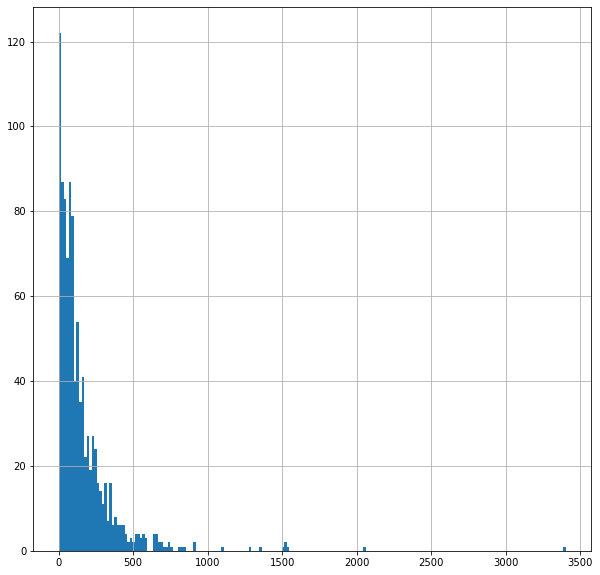

In [26]:
plt.figure(figsize = (10, 10))
df_debian.total_unique_words.hist(bins = 200)

# Most common words and ngrams

In [27]:
pd.concat([debian_corpus_series.value_counts(), debian_corpus_series.value_counts(normalize=True)], axis = 1).head(10)

,0,1
use,5368,0.015572
instal,5312,0.015409
file,3312,0.009608
packag,3211,0.009315
debian,2915,0.008456
run,2884,0.008366
build,2455,0.007122
sudo,2148,0.006231
version,1997,0.005793
default,1985,0.005758


In [28]:
keep_languages = df_debian.language.value_counts().nlargest(10).index.tolist()
df_debian.loc[~(df_debian.language.isin(keep_languages)), 'language'] = 'other'

df_debian.language.value_counts()

Shell         527
other         101
Python        101
C              82
Dockerfile     41
Makefile       30
Jinja          24
Go             23
C++            22
JavaScript     20
Perl           17
Name: language, dtype: int64

In [29]:
languages = df_debian.language.unique().tolist()
languages = ['all'] + languages

In [30]:
print(languages)

['all', 'Shell', 'C', 'Go', 'other', 'Perl', 'Python', 'Dockerfile', 'JavaScript', 'Jinja', 'Makefile', 'C++']


In [31]:
corpora = []
corpora.append({'language':'all', 'corpus':debian_corpus_list})
for lang in languages[1:]:
    corpora.append({'language':lang, 'corpus':c.clean_data(' '.join(df_debian[df_debian.language == lang].readme_contents))})

In [32]:
df_corpora = pd.DataFrame(corpora)
df_corpora

,language,corpus
0,all,"[packer, templat, debian, written, legaci, jso..."
1,Shell,"[packer, templat, debian, written, legaci, jso..."
2,C,"[deepin, wine, ubuntu, debian, deepinwin, ubun..."
3,Go,"[aptli, imag, target, imag, target, imag, targ..."
4,other,"[gnurootdebian, repositori, correspond, debian..."
5,Perl,"[note, repo, date, im, use, histor, one, old, ..."
6,Python,"[dhvirtualenv, build, statu, doc, content, ove..."
7,Dockerfile,"[whale, erpnext, docker, build, statu, repo, s..."
8,JavaScript,"[electron, instal, debianresourceslogopng, ver..."
9,Jinja,"[logodebopslogo, debianba, data, box, github, ..."


In [33]:
corpora_series = []
for corpus in corpora:
    corpora_series.append(pd.Series(corpus['corpus']).value_counts())
    
word_counts = pd.concat(corpora_series, axis = 1)
word_counts = word_counts.set_axis(languages, axis = 1).fillna(0).apply(lambda s: s.astype(int))

In [34]:
word_counts

,all,Shell,C,Go,other,Perl,Python,Dockerfile,JavaScript,Jinja,Makefile,C++
use,5368,2311,908,93,347,87,853,211,142,201,125,90
instal,5312,3099,380,76,323,103,687,65,150,159,156,114
file,3312,1405,427,71,248,91,584,85,75,117,102,107
packag,3211,1249,191,126,253,143,767,32,188,73,158,31
debian,2915,1584,144,67,248,92,423,78,75,65,117,23
...,...,...,...,...,...,...,...,...,...,...,...,...
intelmklcoreps20180128,1,1,0,0,0,0,0,0,0,0,0,0
ciscoipsecvpninst,0,1,0,0,0,0,0,0,0,0,0,0
dfsg,0,0,0,0,1,0,0,0,0,0,0,0
gotham,0,0,0,0,1,0,0,0,0,0,0,0


# What words are not associated with a language?

-  zabbix  is not in shell, but is in python
- tdtd, intelr, pi and math were really common in shell

In [35]:
#find difference between shell and all

word_counts[(word_counts['all'] != 0) & (word_counts['Python'] == 0)].head(10)

,all,Shell,C,Go,other,Perl,Python,Dockerfile,JavaScript,Jinja,Makefile,C++
tr,350,114,0,0,0,0,0,0,0,206,12,18
math,332,322,10,0,0,0,0,0,0,0,0,0
pi,322,297,4,4,17,0,0,0,0,0,0,0
br,232,189,1,0,26,0,0,0,3,0,9,4
board,210,62,140,0,3,0,0,0,1,0,4,0
dockerfil,178,71,0,0,0,0,0,104,0,0,3,0
openvpn,139,114,0,0,20,4,0,0,1,0,0,0
ufw,122,106,0,0,5,0,0,0,0,10,0,1
firmwar,116,74,34,0,3,0,0,0,0,0,2,3
tmpf,116,110,2,0,0,0,0,0,0,0,0,4


In [36]:
word_counts[word_counts.index.str.contains('instal')]

,all,Shell,C,Go,other,Perl,Python,Dockerfile,JavaScript,Jinja,Makefile,C++
instal,5312,3099,380,76,323,103,687,65,150,159,156,114
installsh,82,70,6,0,0,0,4,2,0,0,0,0
reinstal,35,14,13,0,2,0,6,0,0,0,0,0
noinstallrecommend,23,14,3,0,2,0,2,0,0,2,0,0
preinstal,21,13,2,0,0,0,2,1,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
hrefinstallingumbrelubuntua,1,1,0,0,0,0,0,0,0,0,0,0
installdebianwheezyonyourbananapi,1,1,0,0,0,0,0,0,0,0,0,0
rails_installlog,1,1,0,0,0,0,0,0,0,0,0,0
install_postfix,1,0,0,0,0,0,0,0,0,1,0,0


# ngrams

In [37]:
def make_bigrams(s, n = 2):
    return list(nltk.ngrams(s, n))

unique_words = []
top_x = 100
for corpus in corpora:
    corpus['corpus_length'] = len(corpus['corpus'])
    corpus['unique_to_corpus'] = list(set(corpus['corpus']).difference(set(corpora[0]['corpus'])))
    corpus['len_unique'] = len(corpus['unique_to_corpus'])
    corpus['bigrams'] = make_bigrams(corpus['corpus'])
    corpus['trigrams'] = make_bigrams(corpus['corpus'], n = 3)
    corpus['quadgrams'] = make_bigrams(corpus['corpus'], n = 4)

In [38]:
pd.DataFrame(corpora)

,language,corpus,corpus_length,unique_to_corpus,len_unique,bigrams,trigrams,quadgrams
0,all,"[packer, templat, debian, written, legaci, jso...",344723,[],0,"[(packer, templat), (templat, debian), (debian...","[(packer, templat, debian), (templat, debian, ...","[(packer, templat, debian, written), (templat,..."
1,Shell,"[packer, templat, debian, written, legaci, jso...",162302,[ciscoipsecvpninst],1,"[(packer, templat), (templat, debian), (debian...","[(packer, templat, debian), (templat, debian, ...","[(packer, templat, debian, written), (templat,..."
2,C,"[deepin, wine, ubuntu, debian, deepinwin, ubun...",49388,[],0,"[(deepin, wine), (wine, ubuntu), (ubuntu, debi...","[(deepin, wine, ubuntu), (wine, ubuntu, debian...","[(deepin, wine, ubuntu, debian), (wine, ubuntu..."
3,Go,"[aptli, imag, target, imag, target, imag, targ...",5676,[],0,"[(aptli, imag), (imag, target), (target, imag)...","[(aptli, imag, target), (imag, target, imag), ...","[(aptli, imag, target, imag), (imag, target, i..."
4,other,"[gnurootdebian, repositori, correspond, debian...",23958,"[dfsg, gotham]",2,"[(gnurootdebian, repositori), (repositori, cor...","[(gnurootdebian, repositori, correspond), (rep...","[(gnurootdebian, repositori, correspond, debia..."
5,Perl,"[note, repo, date, im, use, histor, one, old, ...",4646,[],0,"[(note, repo), (repo, date), (date, im), (im, ...","[(note, repo, date), (repo, date, im), (date, ...","[(note, repo, date, im), (repo, date, im, use)..."
6,Python,"[dhvirtualenv, build, statu, doc, content, ove...",49245,[],0,"[(dhvirtualenv, build), (build, statu), (statu...","[(dhvirtualenv, build, statu), (build, statu, ...","[(dhvirtualenv, build, statu, doc), (build, st..."
7,Dockerfile,"[whale, erpnext, docker, build, statu, repo, s...",10430,[],0,"[(whale, erpnext), (erpnext, docker), (docker,...","[(whale, erpnext, docker), (erpnext, docker, b...","[(whale, erpnext, docker, build), (erpnext, do..."
8,JavaScript,"[electron, instal, debianresourceslogopng, ver...",7265,[],0,"[(electron, instal), (instal, debianresourcesl...","[(electron, instal, debianresourceslogopng), (...","[(electron, instal, debianresourceslogopng, ve..."
9,Jinja,"[logodebopslogo, debianba, data, box, github, ...",13765,[ericsysminsystem],1,"[(logodebopslogo, debianba), (debianba, data),...","[(logodebopslogo, debianba, data), (debianba, ...","[(logodebopslogo, debianba, data, box), (debia..."
